In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [29]:
# final = pd.read_csv('data/final_video_data.csv')
# nontrend = pd.read_csv('data/non_trending_data.csv')
# nontrend['Trended'] = 0

# trend = pd.read_csv('data/trending_full_data.csv')
# trend['Trended'] = 1
# del trend['log norm views']
# trend.head()

,Unnamed: 0,title,views,likes,dislikes,comment_count,percent_capital,title_length,contains_question_mark,contains_exclamation_mark,VADER,has_full_cap_word,full_cap_count,Trended
0,0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374,57527,2966,15954,0.823529,0.496285,False,False,0.500625,True,0.514982,1
1,1,The Trump Presidency: Last Week Tonight with J...,2418783,97185,6146,12703,0.177419,0.503421,False,False,0.499422,True,0.499703,1
2,2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,146033,5339,8181,0.150943,0.501127,False,False,0.489881,False,0.497156,1
3,3,Nickelback Lyrics: Real or Fake?,343168,10172,666,2146,0.125000,0.495775,True,False,0.491995,False,0.497156,1
4,4,I Dare You: GOING BALD!?,2095731,132235,1989,17518,0.500000,0.493736,True,True,0.499422,True,0.504797,1


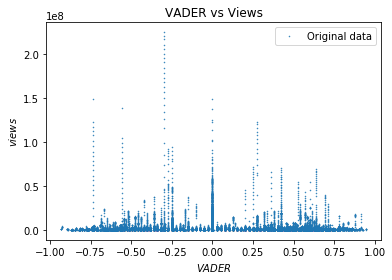

In [3]:
_ = plt.plot(df['VADER'], df['views'], 'o', label='Original data', markersize=.5)
_ = plt.legend()
plt.title("VADER vs Views")
plt.xlabel('$VADER$')
plt.ylabel('$views$')
plt.savefig('VADER_views.png', dpi=400)

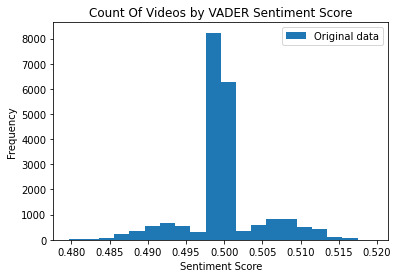

In [8]:
values = [-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1]
count = []
_ = plt.hist(df['VADER'],bins=20, label='Original data')
_ = plt.legend()
plt.title('Count Of Videos by VADER Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.savefig('VADER_frequency.png', dpi=400)

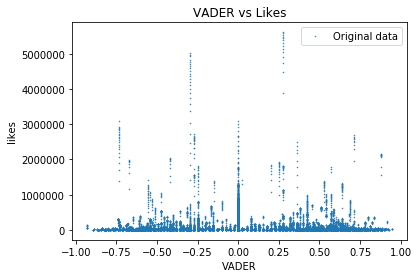

In [5]:
_ = plt.plot(df['VADER'], df['likes'], 'o', label='Original data', markersize=.5)
_ = plt.legend()
plt.title("VADER vs Likes")
plt.xlabel('VADER')
plt.ylabel('likes')
plt.savefig('VADER_likes.png', dpi=400)

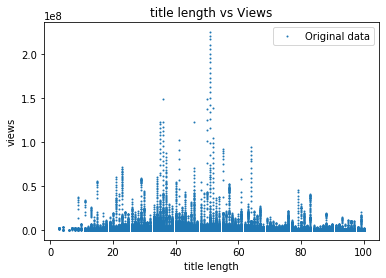

In [6]:
_ = plt.plot(df['title length'], df['views'], 'o', label='Original data', markersize=1)
_ = plt.legend()
plt.title("title length vs Views")
plt.xlabel('title length')
plt.ylabel('views')
plt.savefig('length_views.png', dpi=400)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


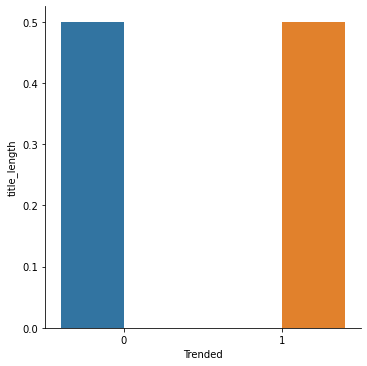

In [34]:
import seaborn as sns
bar_plot_data = pd.concat([trend, nontrend], axis = 0, ignore_index=False)
# bar_plot_data['col'] = (len(trend.T)*(0,) + len(nontrend.T)*(1,))
# bar_plot_data.reset_index(inplace=True)
bar_plot_data
sns.factorplot(x ='Trended', y ='title_length', 
               kind = 'bar', hue = 'Trended', 
               data = bar_plot_data)

In [ ]:


plt.bar(, values, color ='maroon',
        width = 0.4)
plt.title("trending vs non trending title length")
plt.xlabel('title length')

Text(0, 0.5, 'views')

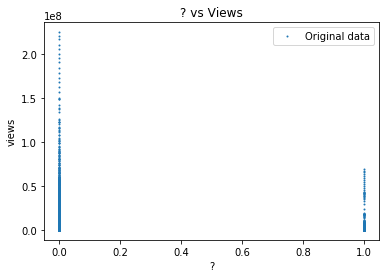

In [8]:
_ = plt.plot(df['contains "?"'], df['views'], 'o', label='Original data', markersize=1)
_ = plt.legend()
plt.title("? vs Views")
plt.xlabel('?')
plt.ylabel('views')

Text(0, 0.5, 'views')

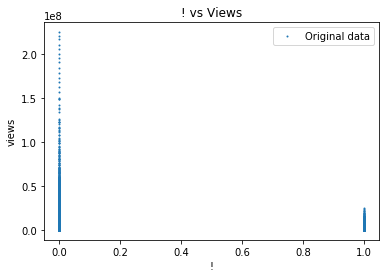

In [9]:
_ = plt.plot(df['contains "!"'], df['views'], 'o', label='Original data', markersize=1)
_ = plt.legend()
plt.title("! vs Views")
plt.xlabel('!')
plt.ylabel('views')

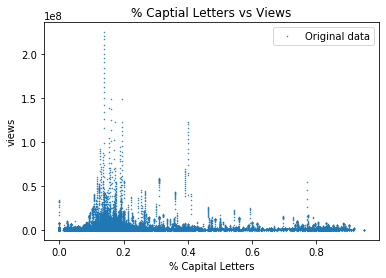

In [10]:
_ = plt.plot(df['% Capital Letters'], df['views'], 'o', label='Original data', markersize=.5)
_ = plt.legend()
plt.title("% Captial Letters vs Views")
plt.xlabel('% Capital Letters')
plt.ylabel('views')
plt.savefig('captial_views.png', dpi=400)

In [11]:
def fully_capital(title):
    tokens = str(title).split()
    for token in tokens:
        if(token.isupper()):
            return True
    return False

In [12]:
df['Contains Fully Capital Word'] = df['title'].apply(fully_capital)

Text(0, 0.5, 'views')

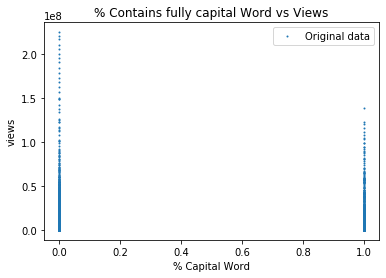

In [13]:
_ = plt.plot(df['Contains Fully Capital Word'], df['views'], 'o', label='Original data', markersize=1)
_ = plt.legend()
plt.title("% Contains fully capital Word vs Views")
plt.xlabel('% Capital Word')
plt.ylabel('views')

In [14]:
np.mean(df['Contains Fully Capital Word'])

0.4395711738992405

In [28]:
def number_fully_capital(title):
    count = 0
    tokens = str(title).split()
    for token in tokens:
        if(token.isupper()):
            count+=1
    return count

In [16]:
df['Fully Capital Count'] = df['title'].apply(number_fully_capital)

Text(0, 0.5, 'views')

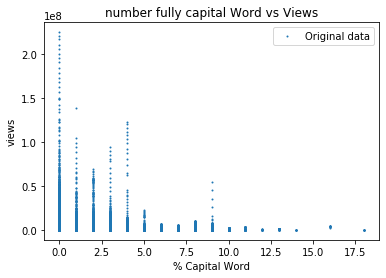

In [17]:
_ = plt.plot(df['Fully Capital Count'], df['views'], 'o', label='Original data', markersize=1)
_ = plt.legend()
plt.title("number fully capital Word vs Views")
plt.xlabel('% Capital Word')
plt.ylabel('views')

In [18]:
df.drop(columns=['Fully Capital Count'])

,title,views,likes,dislikes,comment_count,% Capital Letters,title length,"contains ""?""","contains ""!""",VADER Compound Score,Contains Fully Capital Word
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374,57527,2966,15954,0.823529,34,False,False,0.0772,True
1,The Trump Presidency: Last Week Tonight with J...,2418783,97185,6146,12703,0.177419,62,False,False,0.0000,True
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,146033,5339,8181,0.150943,53,False,False,-0.6124,False
3,Nickelback Lyrics: Real or Fake?,343168,10172,666,2146,0.125000,32,True,False,-0.4767,False
4,I Dare You: GOING BALD!?,2095731,132235,1989,17518,0.500000,24,True,True,0.0000,True
...,...,...,...,...,...,...,...,...,...,...,...
40944,The Cat Who Caught the Laser,1685609,38160,1385,2657,0.178571,28,False,False,0.0000,False
40945,True Facts : Ant Mutualism,1064798,60008,382,3936,0.153846,26,False,False,0.4215,False
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,1066451,48068,1032,3992,0.702381,84,False,True,0.6932,True
40947,How Black Panther Should Have Ended,5660813,192957,2846,13088,0.171429,35,False,False,0.0000,False


In [19]:
df.to_csv('processedTitleData.csv', index=False)

Text(0, 0.5, 'views')

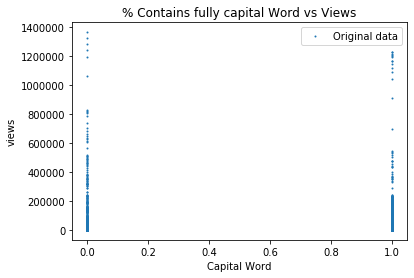

In [20]:
_ = plt.plot(df['Contains Fully Capital Word'], df['comment_count'], 'o', label='Original data', markersize=1)
_ = plt.legend()
plt.title("% Contains fully capital Word vs Views")
plt.xlabel('Capital Word')
plt.ylabel('views')

In [21]:
print(np.median(df.loc[df['Contains Fully Capital Word'] == True]['views']))
print(np.median(df.loc[df['Contains Fully Capital Word'] == True]['likes']))
print(np.median(df.loc[df['Contains Fully Capital Word'] == True]['comment_count']))

687902.0
18502.0
2052.5


In [22]:
print(np.median(df.loc[df['Contains Fully Capital Word'] == False]['views']))
print(np.median(df.loc[df['Contains Fully Capital Word'] == False]['likes']))
print(np.median(df.loc[df['Contains Fully Capital Word'] == False]['comment_count']))

677138.0
17791.0
1737.0


In [23]:
print(np.median(df.loc[df['contains "!"'] == True]['views']))
print(np.median(df.loc[df['contains "!"'] == True]['likes']))

881807.0
24427.0


In [24]:
print(np.median(df.loc[df['contains "!"'] == False]['views']))
print(np.median(df.loc[df['contains "!"'] == False]['likes']))

656472.0
17118.0


In [25]:
print(np.median(df.loc[df['contains "?"'] == True]['views']))
print(np.median(df.loc[df['contains "?"'] == True]['likes']))

619611.0
15895.0


In [26]:
print(np.median(df.loc[df['contains "?"'] == False]['views']))
print(np.median(df.loc[df['contains "?"'] == False]['likes']))

685579.0
18336.0
